In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from utilsforecast.plotting import plot_series as plot_series_utils
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsforecast.arima import ndiffs 
from statsforecast.arima import nsdiffs 

In [2]:
sns.set_theme(style = 'darkgrid')

Data Loading

In [3]:
data = pd.read_excel("../data/raw/wind_speed_2024.xlsx", index_col=0)
data.head()

,Data,Alagoas,Paraíba,Pernambuco,Rio Grande do Norte,Rio Grande do Sul,Santa Catarina,Sergipe
0,1980-01-01,7.130379,7.805494,7.073644,8.042703,7.142046,4.829946,6.759042
1,1980-02-01,6.508296,6.667070,6.375263,6.571027,6.761244,4.829477,6.288946
2,1980-03-01,6.994155,7.669710,7.040406,7.427828,6.182708,4.329960,6.846870
3,1980-04-01,7.048815,7.754765,7.136591,7.765971,7.115378,4.739272,6.818778
4,1980-05-01,7.139307,8.406832,7.499776,8.620216,6.427715,4.527883,6.894530


Exploratory Data Analysis

In [80]:
data.drop(columns="Data").describe()

,Alagoas,Paraíba,Pernambuco,Rio Grande do Norte,Rio Grande do Sul,Santa Catarina,Sergipe
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,7.291193,7.964428,7.300773,8.139462,7.234820,5.079766,7.042268
std,0.535239,0.937588,0.697529,1.135637,0.639656,0.443635,0.482178
min,5.723667,4.928568,5.250587,4.471836,5.234815,3.905448,5.555333
25%,6.944490,7.358776,6.849505,7.399966,6.819106,4.758026,6.736959
50%,7.359305,8.112879,7.394512,8.340910,7.221998,5.065161,7.098141
75%,7.685285,8.659054,7.828691,8.992723,7.635044,5.397150,7.407601
max,8.971566,10.099437,9.499926,10.654512,9.507480,6.421877,8.732576


In [79]:
data.drop(columns="Data").kurtosis()

Alagoas               -0.099206
Paraíba               -0.092479
Pernambuco            -0.119410
Rio Grande do Norte   -0.150718
Rio Grande do Sul      0.350596
Santa Catarina        -0.310436
Sergipe                0.009331
dtype: float64

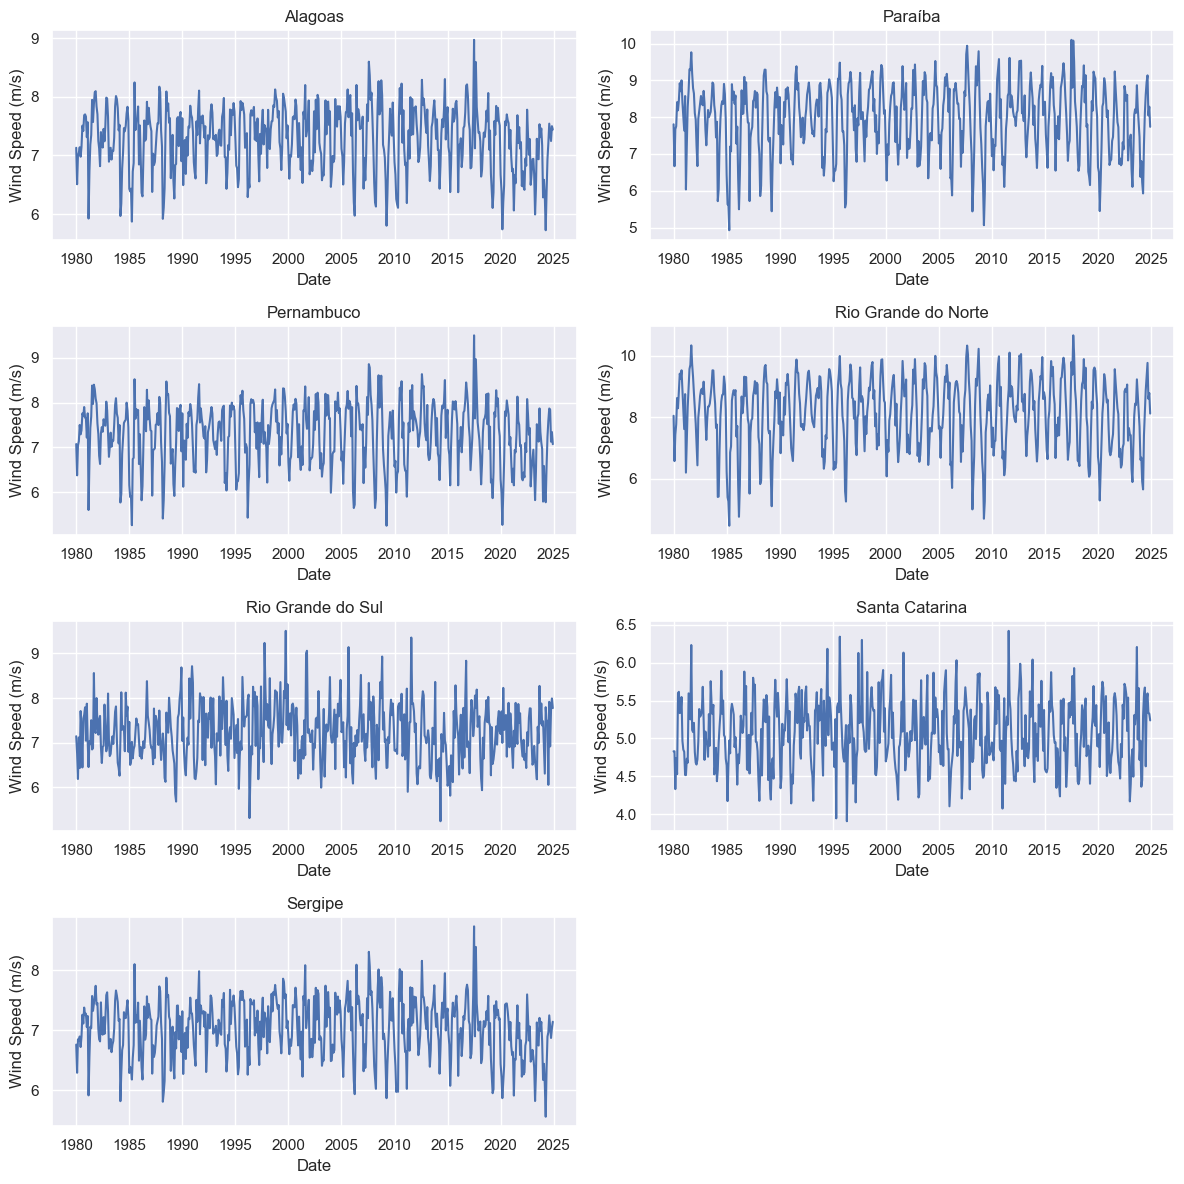

In [34]:
states = ['Alagoas', 'Paraíba', 'Pernambuco', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Santa Catarina', 'Sergipe']
n_states = len(states)
n_cols = 2
n_rows = int(np.ceil(n_states / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
axs = axs.flatten()

for i, state in enumerate(states):
	axs[i].plot(data['Data'], data[state])
	axs[i].set_title(f'{state}')
	axs[i].set_ylabel('Wind Speed (m/s)')
	axs[i].set_xlabel('Date')

for j in range(i + 1, len(axs)):
	fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

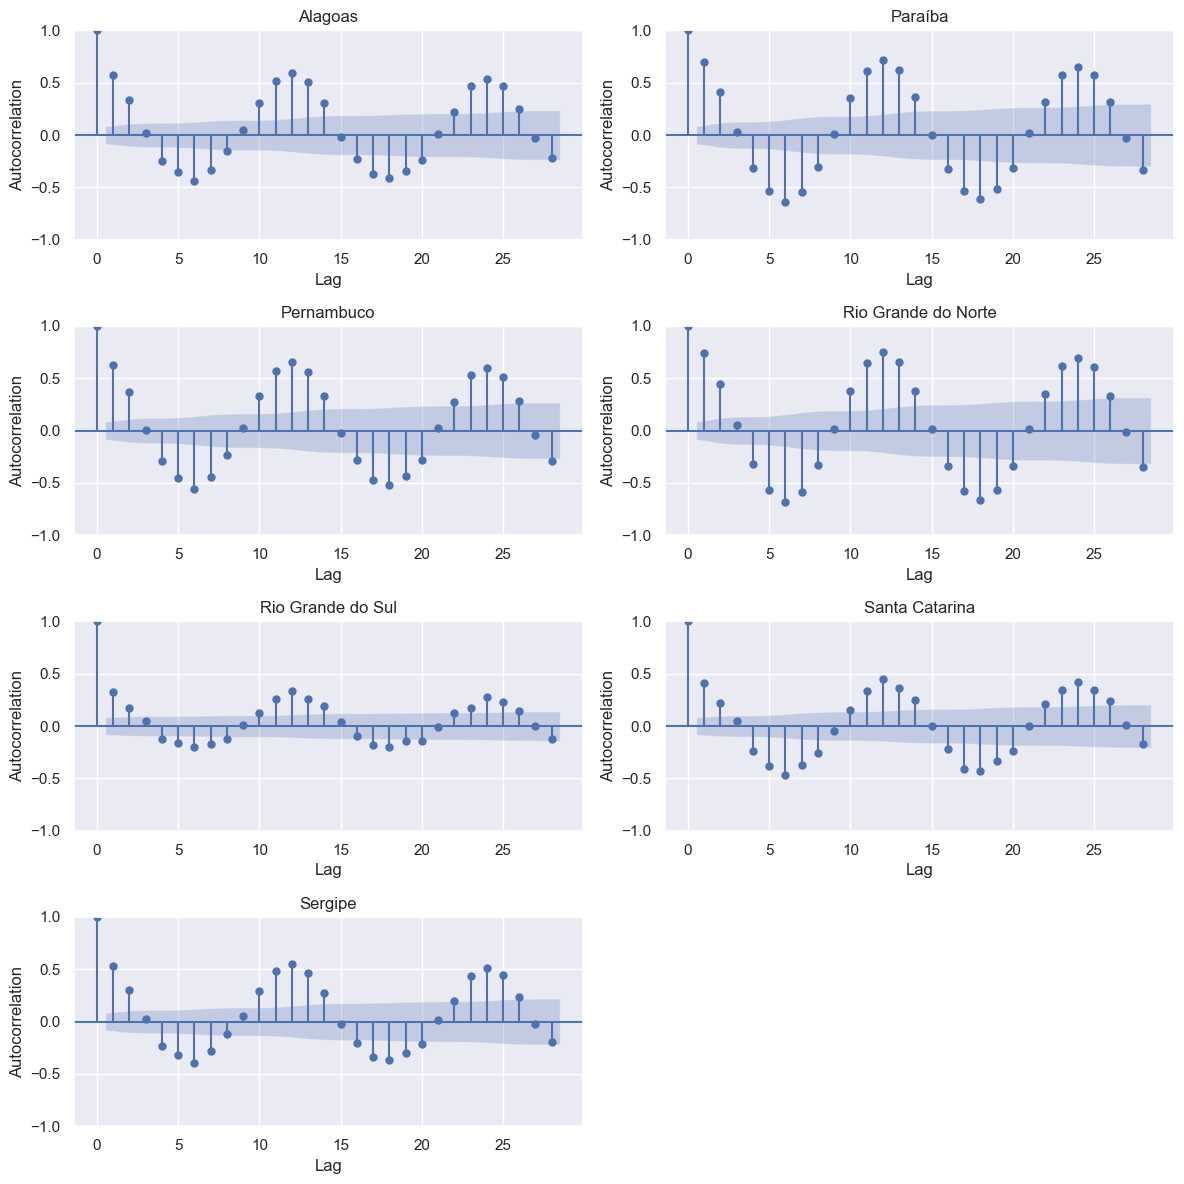

In [10]:
fig_acf, axs_acf = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
axs_acf = axs_acf.flatten()

for idx, state in enumerate(states):
	plot_acf(data[state], ax=axs_acf[idx], title=f'{state}')
	axs_acf[idx].set_xlabel('Lag')
	axs_acf[idx].set_ylabel('Autocorrelation')

for k in range(idx + 1, len(axs_acf)):
	fig_acf.delaxes(axs_acf[k])

plt.tight_layout()
plt.show()

Testando estacionariedade da série original utilizando test ADF

In [71]:
stationarity_tests= {}
for state in data.drop(columns = ["Data"]):
    adf = adfuller(data[state])
    print(f'Test statistics of state {state}: {adf[0]:.4f}, p-value : {adf[1]:.3f}')
    stationarity_tests[state] = {
        'ADF Stat': round(adf[0],4),
        'p-value': round(adf[1],3),
        'Stationary': 'yes' if adf[1] < 0.05 else 'no'
 	}

Test statistics of state Alagoas: -3.2288, p-value : 0.018
Test statistics of state Paraíba: -3.8255, p-value : 0.003
Test statistics of state Pernambuco: -3.8214, p-value : 0.003
Test statistics of state Rio Grande do Norte: -4.2103, p-value : 0.001
Test statistics of state Rio Grande do Sul: -3.8960, p-value : 0.002
Test statistics of state Santa Catarina: -7.9345, p-value : 0.000
Test statistics of state Sergipe: -3.1648, p-value : 0.022


In [76]:
pd.DataFrame(stationarity_tests).transpose().to_excel('../data/stationarity_test.xlsx')